In [19]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
data = pd.read_csv("dataset.csv")

In [8]:
data.head(20)

,Id,IP,bot,FunctionId,functionTrigger,timestamp,SubmitTime,RTT,InvocationDelay,ResponseDelay,FunctionDuration,ActiveFunctionsAtRequest,ActiveFunctionsAtResponse,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket
0,0,38.57.146.249,True,12,notification,2022-01-02T03:31:34.498Z,73,2616,1416.003662,154.615479,1045.380831,12.0,999.0,100.0,19.867088,97.914746,Delay-insensitive,8.0,56.0
1,1,55.220.132.116,True,12,notification,2022-01-02T03:54:53.136Z,73,2616,1416.003662,154.615479,1045.380831,12.0,999.0,100.0,19.867088,97.914746,Delay-insensitive,8.0,56.0
2,2,141.232.38.48,True,12,notification,2022-01-02T03:38:31.950Z,73,2616,1416.003662,154.615479,1045.380831,12.0,999.0,100.0,19.867088,97.914746,Delay-insensitive,8.0,56.0
3,3,228.143.56.163,True,12,notification,2022-01-02T03:44:36.548Z,73,2616,1416.003662,154.615479,1045.380831,12.0,999.0,100.0,19.867088,97.914746,Delay-insensitive,8.0,56.0
4,4,223.113.21.186,True,12,notification,2022-01-02T03:52:54.326Z,73,2616,1416.003662,154.615479,1045.380831,12.0,999.0,100.0,19.867088,97.914746,Delay-insensitive,8.0,56.0
5,5,223.113.21.186,True,12,notification,2022-01-02T03:53:51.412Z,73,2616,1416.003662,154.615479,1045.380831,12.0,999.0,100.0,19.867088,97.914746,Delay-insensitive,8.0,56.0
6,6,243.138.37.32,True,12,notification,2022-01-02T03:24:03.665Z,73,2616,1416.003662,154.615479,1045.380831,12.0,999.0,100.0,19.867088,97.914746,Delay-insensitive,8.0,56.0
7,7,243.138.37.32,True,12,notification,2022-01-02T03:24:48.516Z,73,2616,1416.003662,154.615479,1045.380831,12.0,999.0,100.0,19.867088,97.914746,Delay-insensitive,8.0,56.0
8,8,94.35.80.22,True,12,notification,2022-01-02T03:30:07.778Z,73,2616,1416.003662,154.615479,1045.380831,12.0,999.0,100.0,19.867088,97.914746,Delay-insensitive,8.0,56.0
9,9,112.21.188.21,True,12,notification,2022-01-02T03:14:21.516Z,73,2616,1416.003662,154.615479,1045.380831,12.0,999.0,100.0,19.867088,97.914746,Delay-insensitive,8.0,56.0


In [ ]:
print(data.shape)
data.describe()

(187087, 19)


,Id,FunctionId,SubmitTime,RTT,InvocationDelay,ResponseDelay,FunctionDuration,ActiveFunctionsAtRequest,ActiveFunctionsAtResponse,maxcpu,avgcpu,p95maxcpu,vmcorecountbucket,vmmemorybucket
count,187087.000000,187087.000000,187087.000000,187087.000000,187087.000000,187087.000000,187087.000000,187087.000000,187087.000000,187087.000000,187087.000000,187087.000000,187087.000000,187087.000000
mean,93543.000000,28.592569,85.841250,2494.167083,1239.287586,165.658396,1089.373666,28.592569,996.465741,97.050470,31.440571,88.441047,4.776297,31.000653
std,54007.509243,13.777358,11.968575,286.236688,299.874337,42.838260,62.326101,13.777358,3.010734,5.018163,17.386644,20.042926,3.489087,27.057633
min,0.000000,2.000000,71.000000,1373.000000,170.746338,117.803711,1031.168938,2.000000,988.000000,78.776399,1.350084,7.924250,1.000000,0.750000
25%,46771.500000,17.000000,75.000000,2344.000000,1060.574707,134.759521,1059.582233,17.000000,994.000000,96.017207,19.830185,89.853209,1.000000,1.750000
50%,93543.000000,30.000000,79.000000,2476.000000,1205.249512,145.178711,1074.904203,30.000000,998.000000,99.356190,33.304020,95.297275,8.000000,56.000000
75%,140314.500000,40.000000,98.000000,2593.000000,1388.304443,203.505127,1099.621534,40.000000,999.000000,99.566656,41.804117,98.110481,8.000000,56.000000
max,187086.000000,50.000000,102.000000,3019.000000,1800.190674,247.116455,1437.139511,50.000000,999.000000,100.000000,92.503412,99.586511,8.000000,56.000000


In [9]:
data.isnull().sum()

Id                           0
IP                           0
bot                          0
FunctionId                   0
functionTrigger              0
timestamp                    0
SubmitTime                   0
RTT                          0
InvocationDelay              0
ResponseDelay                1
FunctionDuration             1
ActiveFunctionsAtRequest     1
ActiveFunctionsAtResponse    1
maxcpu                       1
avgcpu                       1
p95maxcpu                    1
vmcategory                   1
vmcorecountbucket            1
vmmemorybucket               1
dtype: int64

**Selecting The Relevant Features**

1. **InvocationDelay:** Similar to RTT, this column represents the delay between invoking a function or service and receiving a response, which could also be indicative of abnormal behavior.

2. **ResponseDelay:** This column represents the delay in receiving a response after invoking a function or service, which could be another indicator of abnormal behavior.

3. **FunctionDuration:** This column represents the duration of each function or service invocation, which could provide insights into the workload and performance of the network.

4. **maxcpu, avgcpu, p95maxcpu:** These columns represent CPU utilization metrics, which could be useful for identifying abnormal resource usage patterns associated with DoS attacks.

**Selecting Additional Features**

1. **RTT (Round-Trip Time):** This column represents the round-trip time for network packets, which could be indicative of network congestion or abnormal network behavior.

2. **ActiveFunctionsAtRequest:** This column indicates the number of active functions or services at the time of each request, which could be relevant for detecting abnormal spikes in network activity.

3. **ActiveFunctionsAtResponse:** This column indicates the number of active functions or services at the time a response is received after invoking a function or service. This metric provides insights into the system's workload and concurrency level at the moment a response is generated.

4. **SubmitTime:** This column typically refers to the timestamp or time at which a request or task is submitted or initiated within a system. Analyzing the SubmitTime can provide valuable insights into the timing and distribution of tasks or requests, helping to identify patterns, bottlenecks, or anomalies in system behavior.

In [10]:
# Select relevant features
selected_features = ['InvocationDelay', 'ResponseDelay', 'FunctionDuration', 'maxcpu', 'avgcpu', 'p95maxcpu']
additional_features = ['SubmitTime', 'RTT', 'ActiveFunctionsAtRequest', 'ActiveFunctionsAtResponse']
X = data[selected_features + additional_features]
y = data['bot']

In [11]:
# Feature Engineering: Transforming raw data into machine-readable format
data_copy = data.copy()
# Timestamp Conversion
data_copy['timestamp'] = data_copy['timestamp'].apply(lambda x: pd.to_datetime(x, utc=True))

# Time-Based Features Extraction
data_copy['HourOfDay'] = data_copy['timestamp'].dt.hour
data_copy['DayOfWeek'] = data_copy['timestamp'].dt.dayofweek


**Interaction Features**

1. maxcpu, avgcpu:

In [ ]:
# Interaction Features
# Creating interaction features using specific columns from the dataset
data_copy['IF_1'] = data_copy['maxcpu'] * data_copy['avgcpu']
data_copy['IF_2'] = data_copy['maxcpu'] / data_copy['avgcpu']

data_copy['IF_3'] = data_copy['InvocationDelay'] * data_copy['ResponseDelay']
data_copy['IF_4'] = data_copy['FunctionDuration'] / data_copy['RTT']


In [12]:
# 3. Statistical features
data_copy['RTT_mean'] = data_copy.groupby('IP')['RTT'].transform('mean')
data_copy['RTT_std'] = data_copy.groupby('IP')['RTT'].transform('std')
data_copy['InvocationDelay_mean'] = data_copy.groupby('IP')['InvocationDelay'].transform('mean')
data_copy['InvocationDelay_std'] = data_copy.groupby('IP')['InvocationDelay'].transform('std')


The code below segments focus on generating entropy-based features from specific columns in the dataset and visualizing them using a scatter matrix plot. Here's an overview of the process:

**Entropy-Based Features Generation**

Entropy features are computed for the columns 'SubmitTime', 'RTT', 'ActiveFunctionsAtRequest', and 'ActiveFunctionsAtResponse' using the Shannon entropy formula.
For each feature, the entropy is calculated based on the frequency distribution of values within each group defined by the 'IP' column.
The resulting entropy values are stored as new columns in the data_copy dataframe, appended with '_entropy' suffix.
Scatter Matrix Plot Visualization:

The same entropy features are visualized using a scatter matrix plot.
A 4x4 grid of axes is created to accommodate the scatter plots for each feature combination.
The diagonal elements of the scatter matrix are replaced with histograms.
The scatter matrix plot is generated for the data_copy dataframe with altered color (green) and increased size (12x12).
These code snippets provide a comprehensive view of the entropy-based feature generation process and its visualization, aiding in understanding the distribution and relationships between features in the dataset.

In [13]:
# 4. Entropy-based features
entropy_features = ['SubmitTime', 'RTT', 'ActiveFunctionsAtRequest', 'ActiveFunctionsAtResponse']

for feature in entropy_features:
    data_copy[f'{feature}_entropy'] = data.groupby('IP')[feature].transform(lambda x: entropy(x.value_counts(normalize=True)))


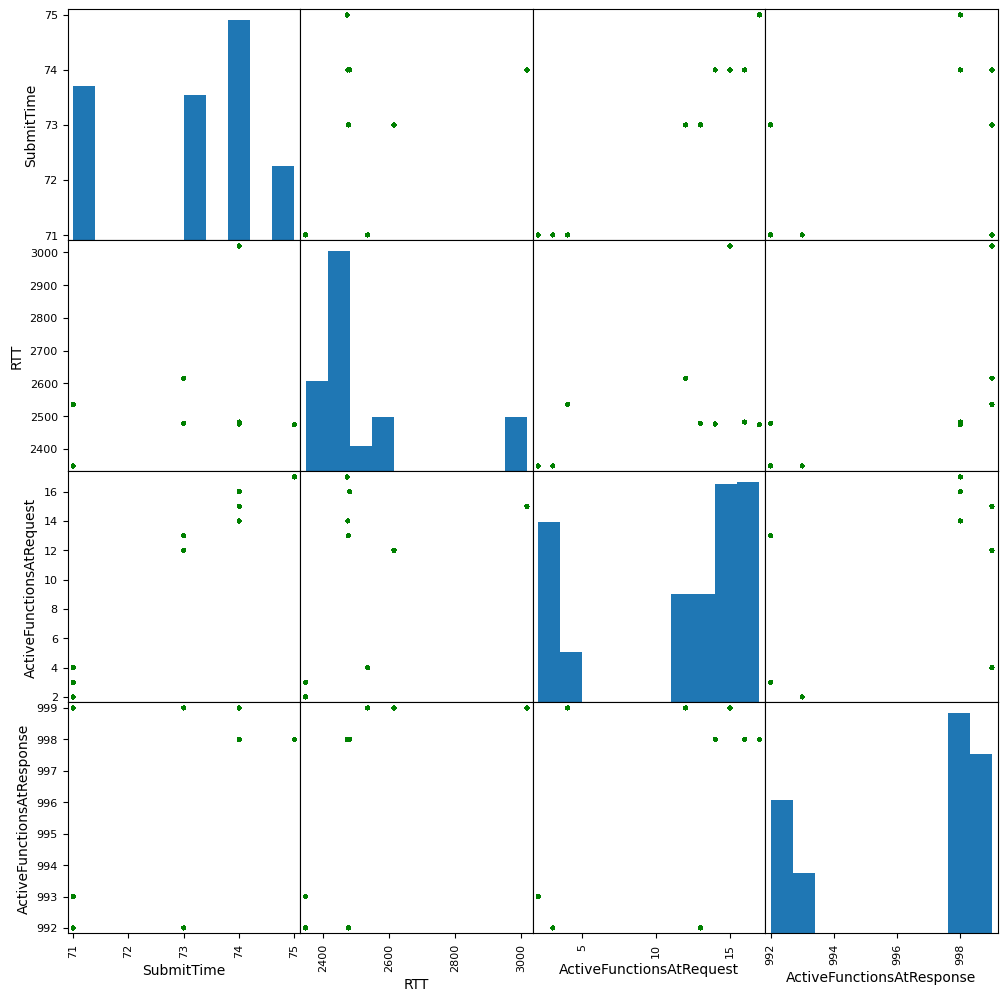

In [16]:
# Entropy features
entropy_features = ['SubmitTime', 'RTT', 'ActiveFunctionsAtRequest', 'ActiveFunctionsAtResponse']

# Generate entropy features for data_copy
for feature in entropy_features:
    data_copy[f'{feature}_entropy'] = data.groupby('IP')[feature].transform(lambda x: entropy(x.value_counts(normalize=True)))

# Create 4x4 grid of axes for scatter matrix plot
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Plot scatter matrix of entropy features for data_copy with changed color and size
pd.plotting.scatter_matrix(data_copy[entropy_features], diagonal='hist', ax=axs, color='green')

# Show plot
plt.show()


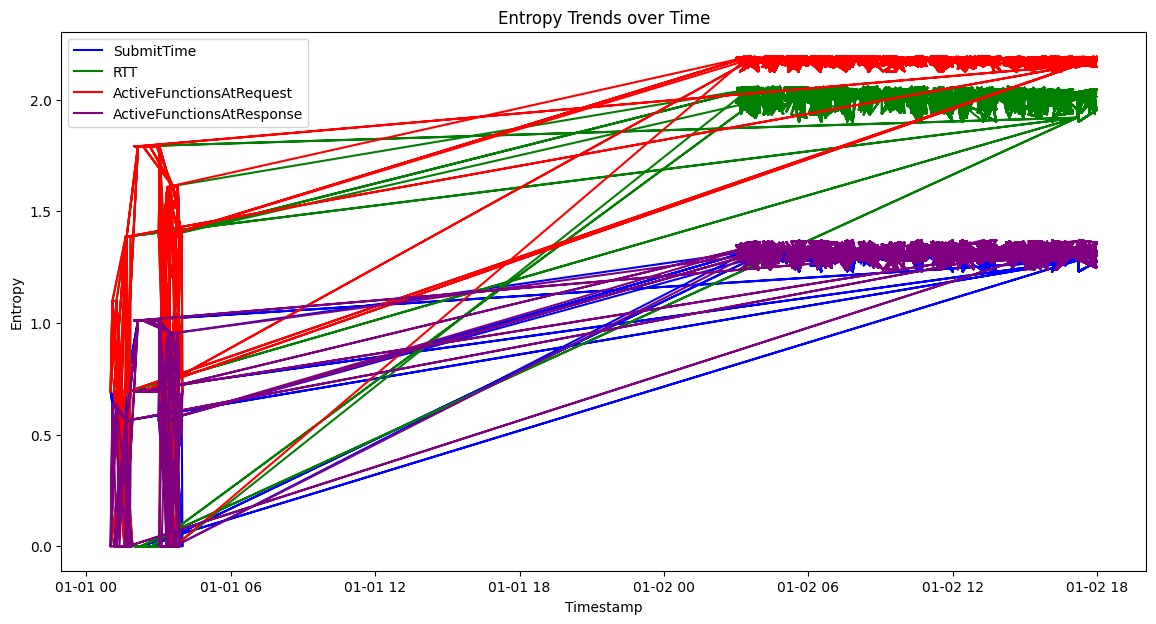

In [18]:
# Plotting Entropy over Time
plt.figure(figsize=(14, 7))

colors = ['blue', 'green', 'red', 'purple']

for i, feature in enumerate(entropy_features):
    plt.plot(data_copy['timestamp'], data_copy[f'{feature}_entropy'], label=feature, color=colors[i])

plt.xlabel('Timestamp')
plt.ylabel('Entropy')
plt.title('Entropy Trends over Time')
plt.legend()
plt.show()


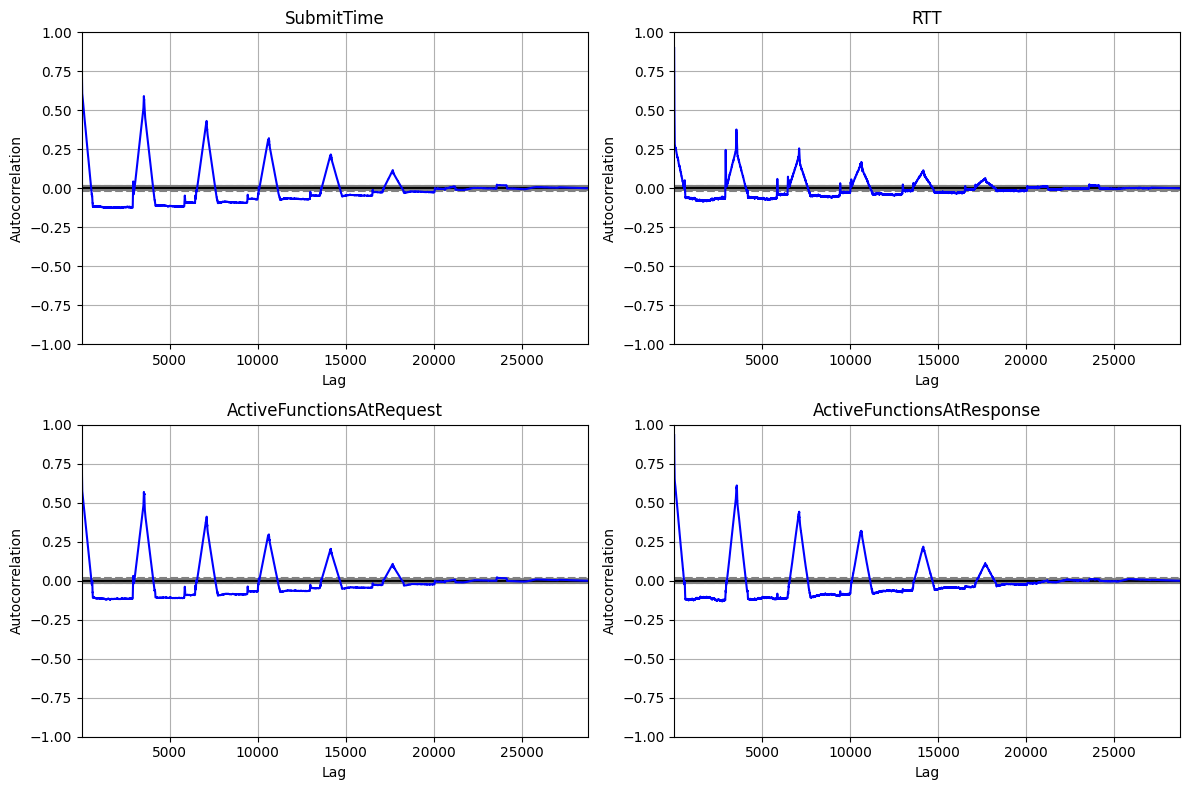

In [20]:
# Plotting Autocorrelation for Entropy Features
plt.figure(figsize=(12, 8))  # Adjusting figure size

for i, feature in enumerate(entropy_features):
    plt.subplot(2, 2, i+1)  # Creating subplots
    autocorrelation_plot(data_copy[f'{feature}_entropy'], color='blue')  # Plotting autocorrelation
    plt.title(feature)  # Adding feature name as title

plt.tight_layout()  # Adjusting layout
plt.show()


**Preprocessing Numerical Data**


1. Function Trigger Encoding: The categorical 'functionTrigger' column underwent encoding using a mapping dictionary to convert categorical values into numerical representations. For instance, 'notification' was encoded as 0, and 'other_value' as 1.

2. Imputation: Missing values in numerical columns were handled using a constant value strategy. NaN values were substituted with 0, ensuring consistency in feature representation.

3. Scaling: Min-Max scaling was employed to normalize the numerical features within a specified range. This transformation guarantees uniformity in feature scales and enables comparison across different value ranges.

These preprocessing steps are pivotal in preparing the numerical data for machine learning models, ensuring the data is appropriately formatted for training and evaluation.

In [23]:
# Data Preprocessing: Scaling and Imputing Missing Values

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
# The 'functionTrigger' column is mapped to numerical values for compatibility with machine learning models.
function_trigger_mapping = {'notification': 0, 'other_value': 1}
data['functionTrigger'] = data['functionTrigger'].map(function_trigger_mapping)

# Define numerical columns for scaling and imputing
numerical_columns = ['Id', 'bot', 'FunctionId', 'functionTrigger', 'SubmitTime', 'RTT',
                     'InvocationDelay', 'ResponseDelay', 'FunctionDuration', 'ActiveFunctionsAtRequest',
                     'ActiveFunctionsAtResponse', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcorecountbucket',
                     'vmmemorybucket']

# Impute NaN values with 0 for numerical columns
imputer = SimpleImputer(strategy='constant', fill_value=0)
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Scale numerical columns using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[numerical_columns])


**Splitting the Dataset**

1. The train_test_split function from scikit-learn is used to split the dataset into training and testing sets.

2. The test_size parameter specifies the proportion of the dataset to include in the test split. Here, 40% of the data is allocated for testing.

3. The random_state parameter ensures reproducibility by fixing the random seed for the data splitting process.

4. After the initial split, another split is performed to create a validation set from the training data. Again, 40% of the training data is allocated for validation.

In [24]:
# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

**Reshaping Input Data**

1. The input data is reshaped to match the input shape required for an LSTM (Long Short-Term Memory) neural network.

2. Each sample in the dataset represents a single timestep, indicated by setting timesteps to 1.

3. The number of features in the dataset is determined by the shape of the scaled dataset X_scaled.

4. The reshaped arrays X_train, X_val, and X_test are prepared for input into the LSTM model.

In [26]:
# Reshape the input data to match the LSTM input shape
timesteps = 1  # Each sample represents a single timestep
num_features = X_scaled.shape[1]  # Number of features in the scaled dataset
X_train = X_train.reshape(X_train.shape[0], timesteps, num_features)
X_val = X_val.reshape(X_val.shape[0], timesteps, num_features)
X_test = X_test.reshape(X_test.shape[0], timesteps, num_features)


**1. Model Architecture**

The Sequential model from Keras is used to create a linear stack of layers.
The first layer added is a Bidirectional LSTM layer with 64 units and ReLU activation function. This layer processes input sequences in both forward and backward directions.
The input shape for the LSTM layer is specified as (timesteps, num_features), matching the reshaped input data.

**2. Output Layer**

Following the LSTM layer, a dense output layer with 1 unit and a sigmoid activation function is added.
Sigmoid activation is used for binary classification tasks, as it outputs probabilities between 0 and 1.

**3. Model Compilation**

The model is compiled using the Adam optimizer and binary cross-entropy loss function, suitable for binary classification tasks.
Additionally, accuracy is chosen as the evaluation metric.

**4. Early Stopping**

Early stopping is implemented to prevent overfitting by monitoring validation loss.
Training will stop if validation loss does not improve after 3 epochs.

**5. Model Training**

The model is trained using the training data (X_train and y_train) and validated on the validation data (X_val and y_val).
Training is conducted over 10 epochs with a batch size of 32.
The early_stopping callback is passed to the fit method to implement early stopping during training.

In [27]:
# Create and train the bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=64, activation='relu'), input_shape=(timesteps, num_features)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3, monitor='val_loss')
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
324/324 [==============================] - 5s 7ms/step - loss: 0.2578 - accuracy: 0.9057 - val_loss: 0.0553 - val_accuracy: 0.9978
Epoch 2/10
324/324 [==============================] - 2s 6ms/step - loss: 0.0217 - accuracy: 0.9985 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 3/10
324/324 [==============================] - 2s 7ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 4/10
324/324 [==============================] - 2s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/10
324/324 [==============================] - 2s 5ms/step - loss: 9.1193e-04 - accuracy: 1.0000 - val_loss: 6.7506e-04 - val_accuracy: 1.0000
Epoch 6/10
324/324 [==============================] - 2s 5ms/step - loss: 5.1886e-04 - accuracy: 1.0000 - val_loss: 4.0418e-04 - val_accuracy: 1.0000
Epoch 7/10
324/324 [==============================] - 2s 5ms/step - loss: 3.2211e-04 - accuracy: 1.0000 - val_loss: 2.6009e-04 - val

**Loss Plot**

1. The loss values for both training and validation sets are plotted against the number of epochs.
2. The loss and val_loss values from the training history are used to plot the model's loss over epochs.
3. The title, labels, and legend are added to the plot for clarity.

**Accuracy Plot**

1. Similarly, the accuracy values for both training and validation sets are plotted against the number of epochs.
2. The accuracy and val_accuracy values from the training history are used to plot the model's accuracy over epochs.
3. The title, labels, and legend are added to the plot to aid interpretation.

These plots provide insights into how the model's loss and accuracy change over epochs during training. Comparing the performance on the training and validation sets helps assess whether the model is overfitting or underfitting.

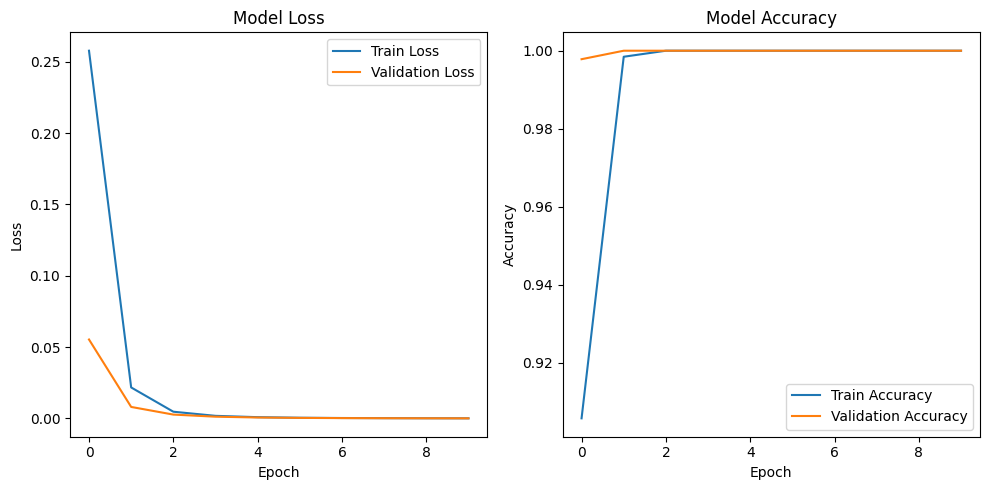

In [28]:
# Get training history
history = model.history

# Plot Model Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Model Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

360/360 [==============================] - 1s 2ms/step


In [30]:
# Assess the presence of DoW attacks
# Assuming y_test and y_pred are arrays of binary labels representing the ground truth and predictions, respectively
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
true_positives = conf_matrix[1, 1]  # Number of true positives
actual_dow_attacks = conf_matrix[1, :].sum()  # Total number of actual DoW attacks
num_samples = len(y_test)  # Total number of samples

# Calculate detection rate (recall)
detection_rate = true_positives / actual_dow_attacks

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Detection Rate: {detection_rate:.2%}")
print(f"Total samples: {num_samples}")
print(f"Actual DoW attacks: {actual_dow_attacks}")
print(f"Detected DoW attacks: {true_positives}")

Accuracy: 1.00
Detection Rate: 100.00%
Total samples: 11492
Actual DoW attacks: 10008
Detected DoW attacks: 10008


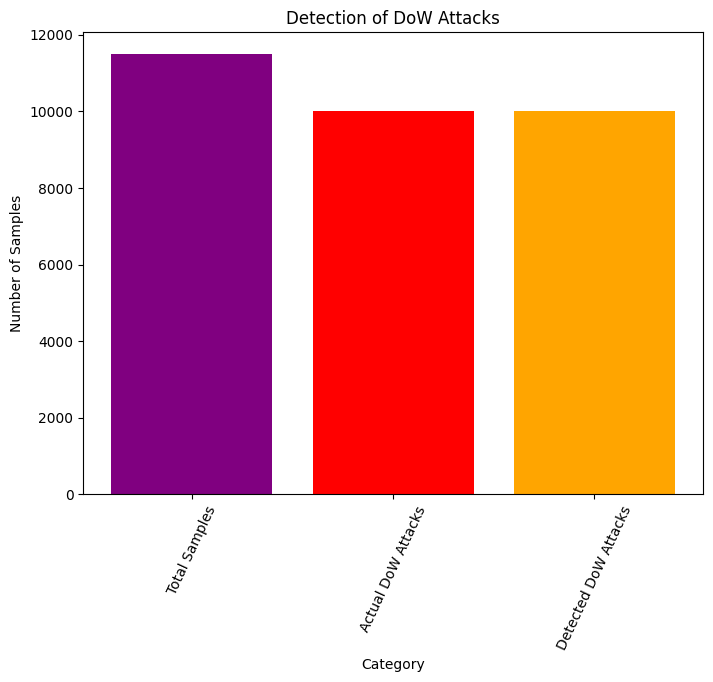

In [34]:
# Plot
labels = ['Total Samples', 'Actual DoW Attacks', 'Detected DoW Attacks']
values = [num_samples, actual_dow_attacks, true_positives]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['purple', 'red', 'orange'])
plt.xlabel('Category')
plt.ylabel('Number of Samples')
plt.title('Detection of DoW Attacks')
plt.xticks(rotation=65)
plt.show()
